# Case Study: Bank Customer Market Segmentation

<img src="https://github.com/ijoseff/ijoseff.github.io/blob/master/assets/img/portfolio/market.png?raw=true" width = "800" height = "400" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Bank-Customer-Market-Segmentation" data-toc-modified-id="Case-Study:-Bank-Customer-Market-Segmentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: Bank Customer Market Segmentation</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Review" data-toc-modified-id="Review-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Review</a></span></li><li><span><a href="#Libraries-and-Data-Importation" data-toc-modified-id="Libraries-and-Data-Importation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Libraries and Data Importation</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Elbow-Method" data-toc-modified-id="Elbow-Method-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Elbow Method</a></span></li><li><span><a href="#K-Means" data-toc-modified-id="K-Means-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>K-Means</a></span></li><li><span><a href="#Pricipal-Component-Analysis" data-toc-modified-id="Pricipal-Component-Analysis-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Pricipal Component Analysis</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

Almost all bank marketing team are leveraging artificial intelligence or machine learning to launch a marketing ad campaign that is tailored to specific group of customers. In order the campaign to be successful they need to know their target market and take advantage of that information. The process is known as "Marketing Segmentation" and it is crucial for maximizing marketing campaign conversion rate. In this project, an unsupervised machine learning will be implemented to distinguish the different customer classes.

**Problem:**
 - Draw insight from the data and create customer classes that will help the marketing team in their campaign
 
**Datase:**
 - Extensive data om bank's customer for the past six months
 - Data includes frequency, amount, tenure, etc.
 
**Source:** Kaggle Competition

# Review

<img src="https://github.com/ijoseff/Bank-Customer-Market-Segmentation/blob/master/kmeans1.png?raw=true" width = "800" height = "800" />

<img src="https://github.com/ijoseff/Bank-Customer-Market-Segmentation/blob/master/kmeans2.png?raw=true" width = "800" height = "800" />

<img src="https://github.com/ijoseff/Bank-Customer-Market-Segmentation/blob/master/kmeans3.png?raw=true" width = "800" height = "800" />

<img src="https://github.com/ijoseff/Bank-Customer-Market-Segmentation/blob/master/elbow1.png?raw=true" width = "800" height = "800" />

<img src="https://github.com/ijoseff/Bank-Customer-Market-Segmentation/blob/master/elbow2.png?raw=true" width = "800" height = "800" />

<img src="https://github.com/ijoseff/Bank-Customer-Market-Segmentation/blob/master/elbow3.png?raw=true" width = "800" height = "800" />

<img src="https://github.com/ijoseff/Bank-Customer-Market-Segmentation/blob/master/elbow4.png?raw=true" width = "800" height = "800" />

<img src="https://github.com/ijoseff/Bank-Customer-Market-Segmentation/blob/master/elbow5.png?raw=true" width = "800" height = "800" />

<img src="https://github.com/ijoseff/Bank-Customer-Market-Segmentation/blob/master/pca.png?raw=true" width = "800" height = "800" />

# Libraries and Data Importation

In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [65]:
# Import data
creditcard_df = pd.read_csv('Marketing_data.csv')

# Data Exploration

In [66]:
# Check data
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Check data statistics
creditcard_df.describe(include ='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C18121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [4]:
# Check more data info
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Check for missing values
creditcard_df.isnull().mean()

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

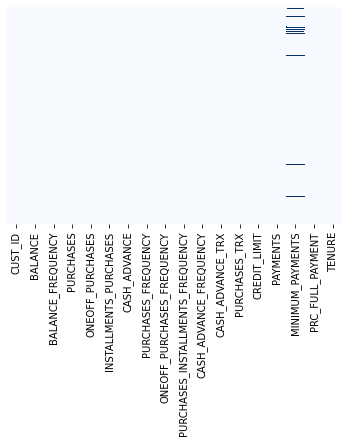

In [6]:
# Visualize missing values
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

# Data Preprocessing

In [7]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [8]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [9]:
# Check for missing values
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
# Check for duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [11]:
# Drop customer ID column
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [12]:
# Check data
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [42]:
# Check the number of columns
n = len(creditcard_df.columns)
n

17

In [14]:
# Check column features
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# Data Visualization

C:\Users\Joseff\miniconda3\envs\joseff\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


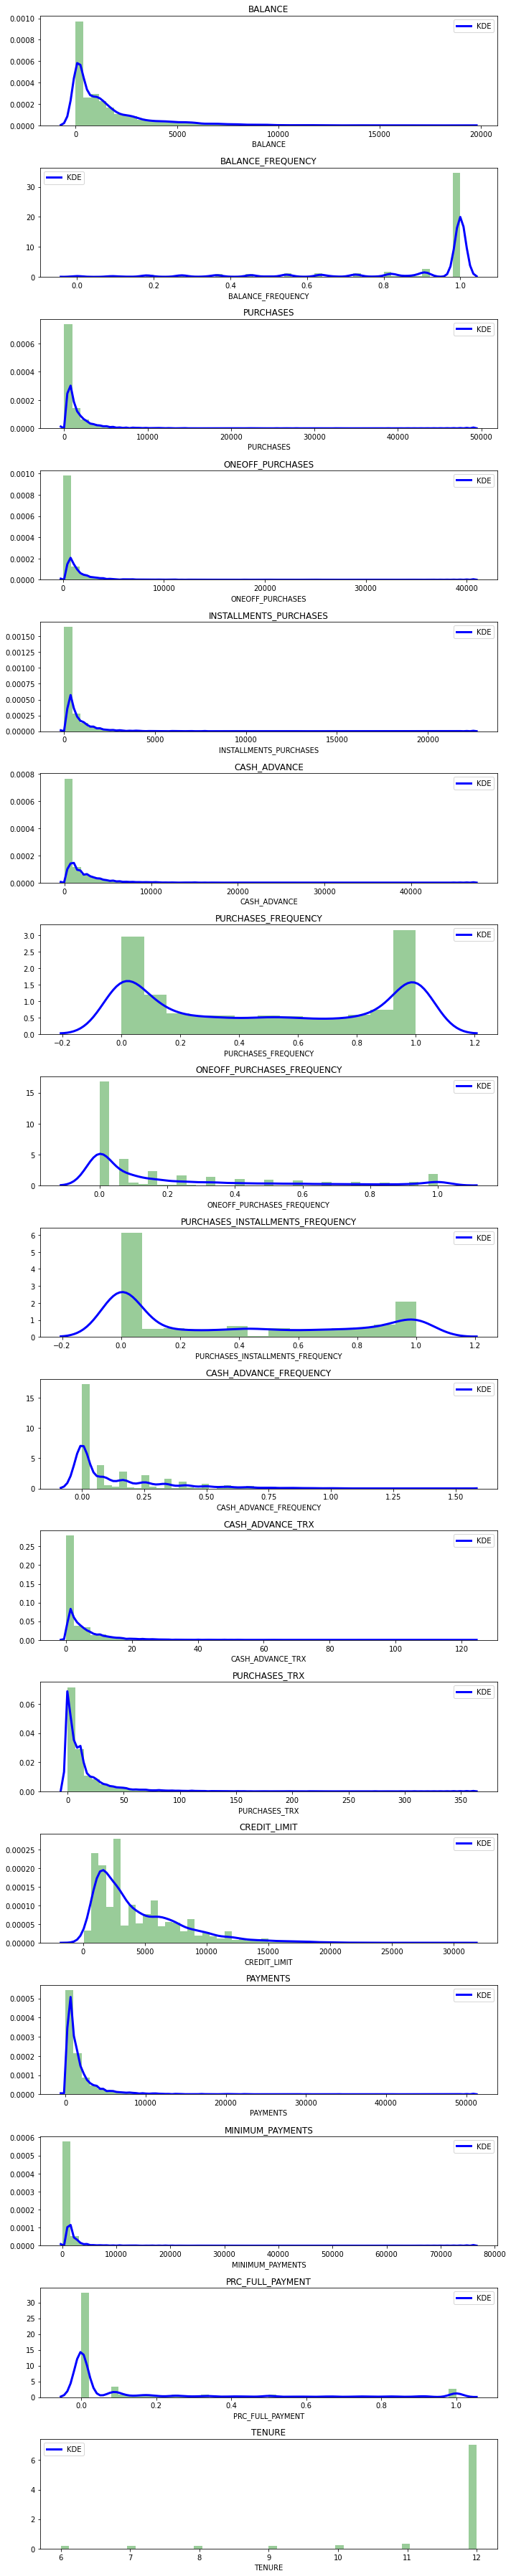

In [15]:
# Distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

# Create KDE plot
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()
plt.show()

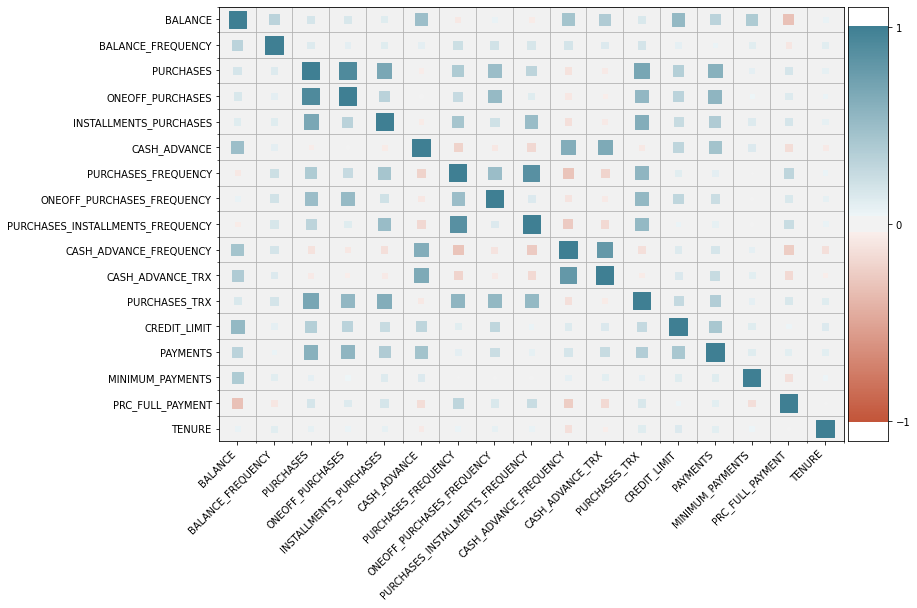

In [16]:
# Import library
from heatmap import corrplot

# Show correlation in the features by using heatmap
plt.figure(figsize=(12, 8))
corrplot(creditcard_df.corr(), size_scale=300)

# Elbow Method

In [17]:
# Scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [18]:
# Check data dimension
creditcard_df_scaled.shape

(8950, 17)

In [19]:
# Check data
creditcard_df_scaled;

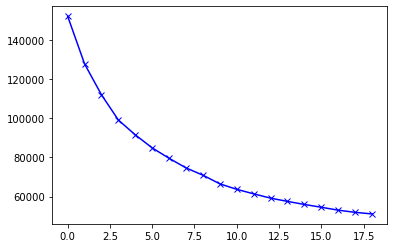

In [20]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')

# Create empty list
scores_1 = []
range_values = range(1,20)


# Create function
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, 'bx-')
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7 or 8.

In [43]:
# Apply KMeans
kmeans = KMeans(4)
kmeans.fit(creditcard_df_scaled)

# Labels (cluster) associated to each data point
labels = kmeans.labels_

In [44]:
# Check centroids
kmeans.cluster_centers_.shape

(4, 17)

In [45]:
# Create dataframe
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])

# Check data
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.322476,0.241250,0.108456,0.000467,0.255359,-0.366056,0.983339,0.316349,0.874057,-0.463118,-0.360406,0.296385,-0.077171,-0.138892,-0.092136,0.395413,0.058679
1,-0.261639,-0.365886,-0.342751,-0.229921,-0.387825,-0.180124,-0.798672,-0.389057,-0.715298,-0.097036,-0.161529,-0.474947,-0.333726,-0.260906,-0.117233,-0.260321,-0.054371
2,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140
3,1.467725,0.384950,-0.234398,-0.164412,-0.252265,1.700434,-0.502199,-0.211784,-0.447558,1.753589,1.627122,-0.281862,0.848503,0.610235,0.491581,-0.405803,-0.095863


In [46]:
# In order to understand what these numbers mean, perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors):
# Those are customers who pay least amount of intrerest charges and careful with their money, 
# Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%.

# Second customers cluster (revolvers): 
# People who use credit card as a loan (most lucrative sector)
# with highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5),
# high cash advance transactions (16) and low percentage of full payment (3%).

# Third customer cluster (VIP/Prime):
# People who have high credit limit $16K and highest percentage of full payment,
# target for increase credit limit and increase spending habits.

# Fourth customer cluster (low tenure):
# These are customers with low tenure (7 years), low balance.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,893.268379,0.934421,1234.923638,593.212350,641.985258,211.235499,0.885012,0.296831,0.711810,0.042470,0.789318,22.076855,4213.670698,1331.065514,649.486614,0.269366,11.595846
1,1019.894654,0.790596,270.911237,210.815386,60.362203,601.142327,0.169805,0.086394,0.080160,0.115726,2.146513,2.904415,3280.217708,977.845284,591.001028,0.077575,11.444556
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,4619.420501,0.968462,502.409949,319.547916,182.947831,4544.760508,0.288794,0.139278,0.186567,0.486055,14.352743,7.703797,7581.649405,3499.713871,2009.815326,0.035024,11.389030


In [47]:
# Labels associated to each data point
labels.shape

(8950,)

In [48]:
# Check minimun and maximum label
labels.min(), labels.max()

(0, 3)

# K-Means

In [49]:
# Fit KMeans
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([0, 1, 2, ..., 2, 0, 0])

In [50]:
# Concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


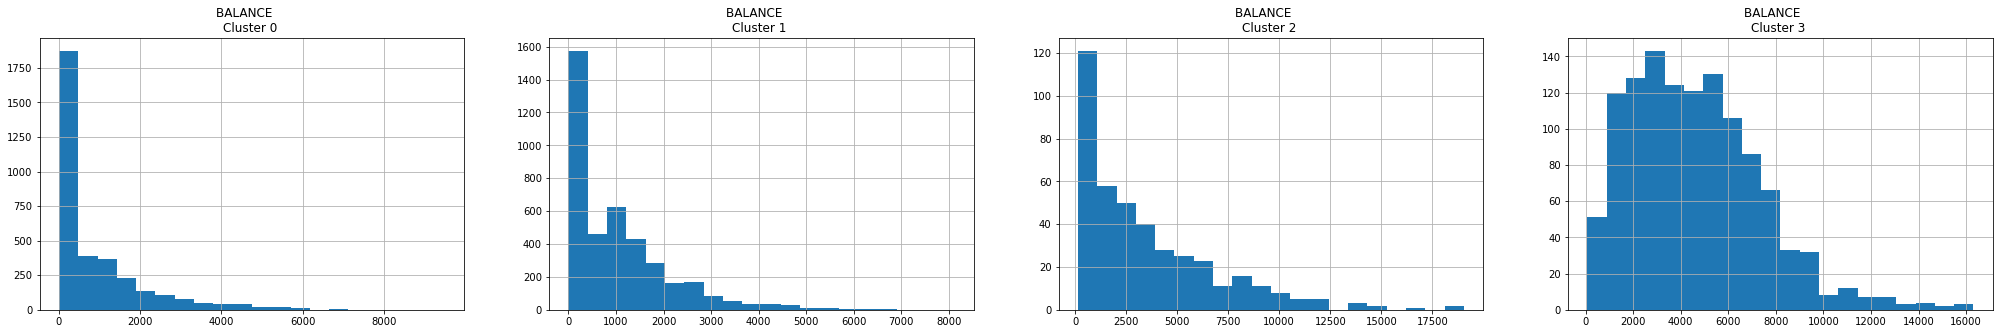

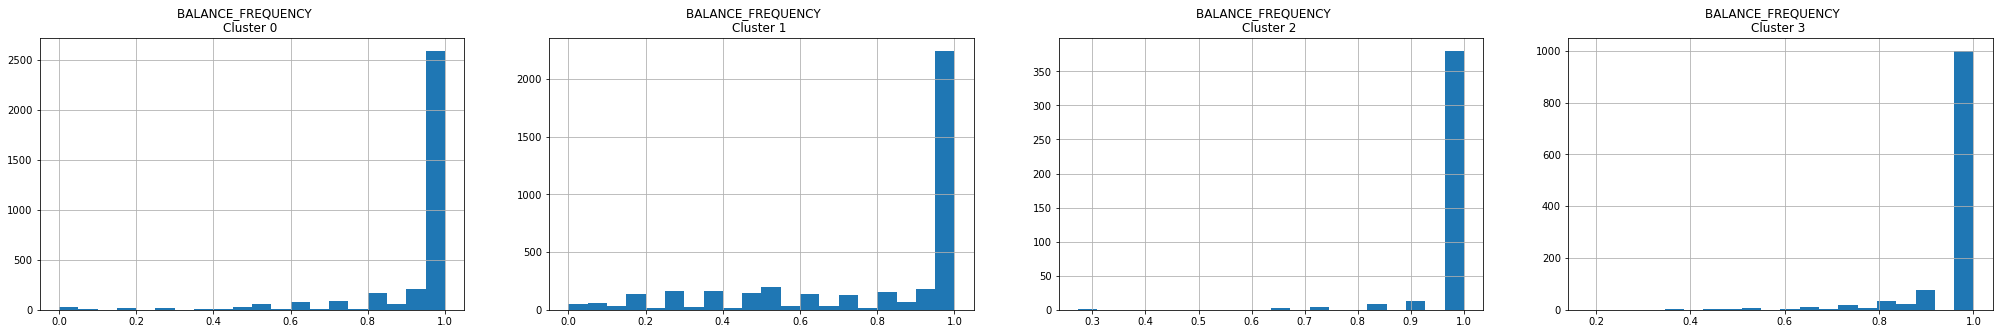

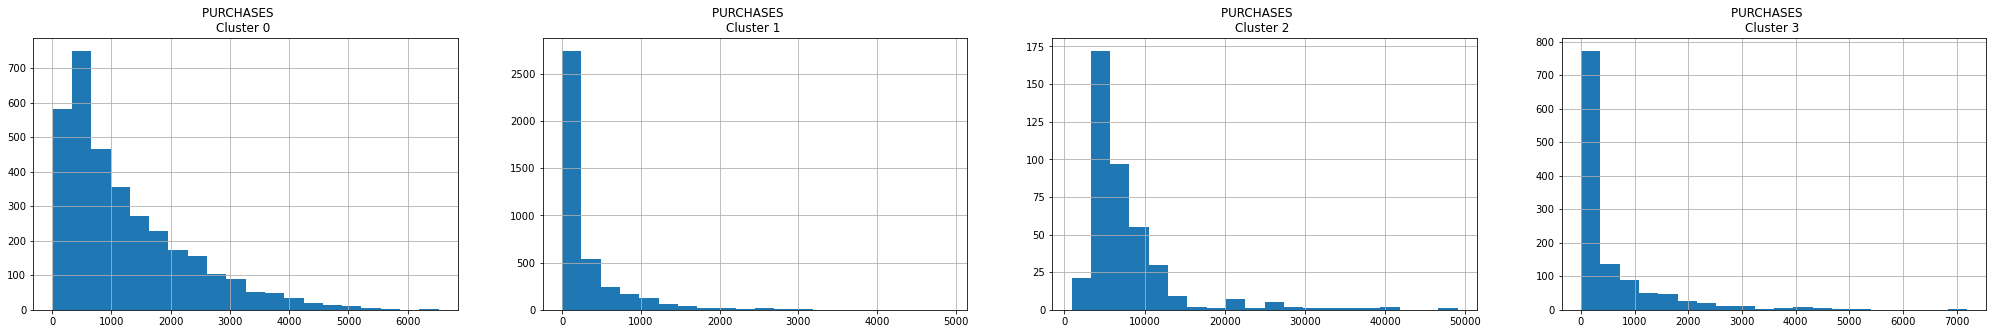

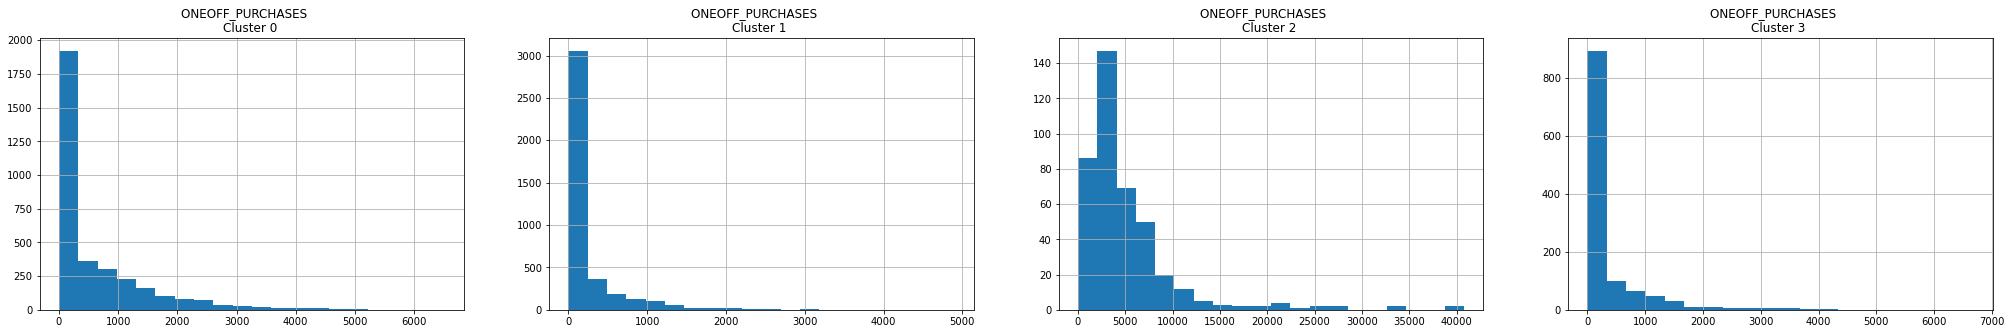

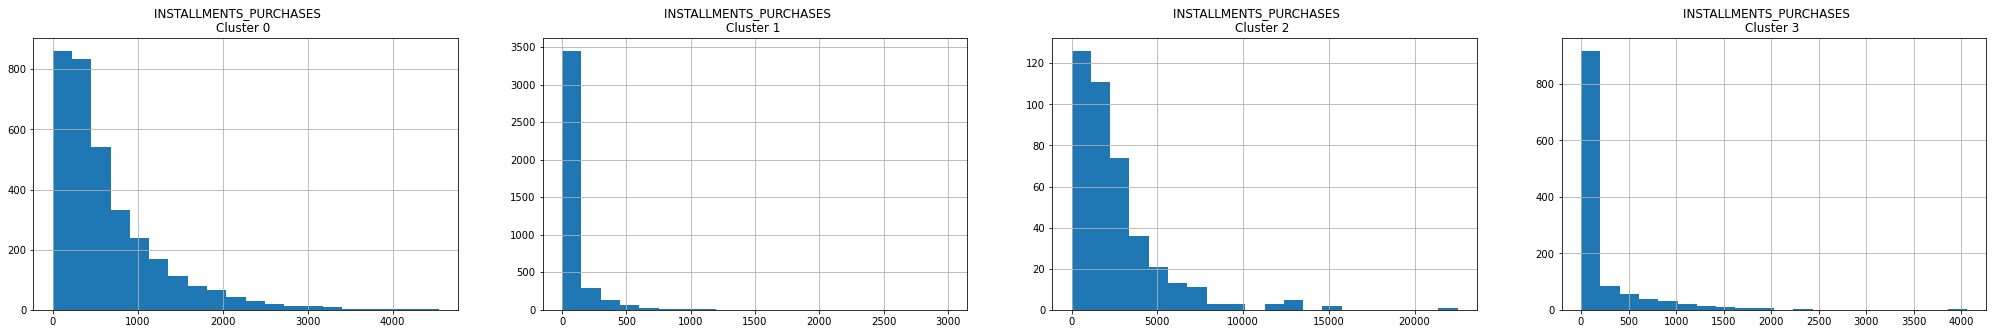

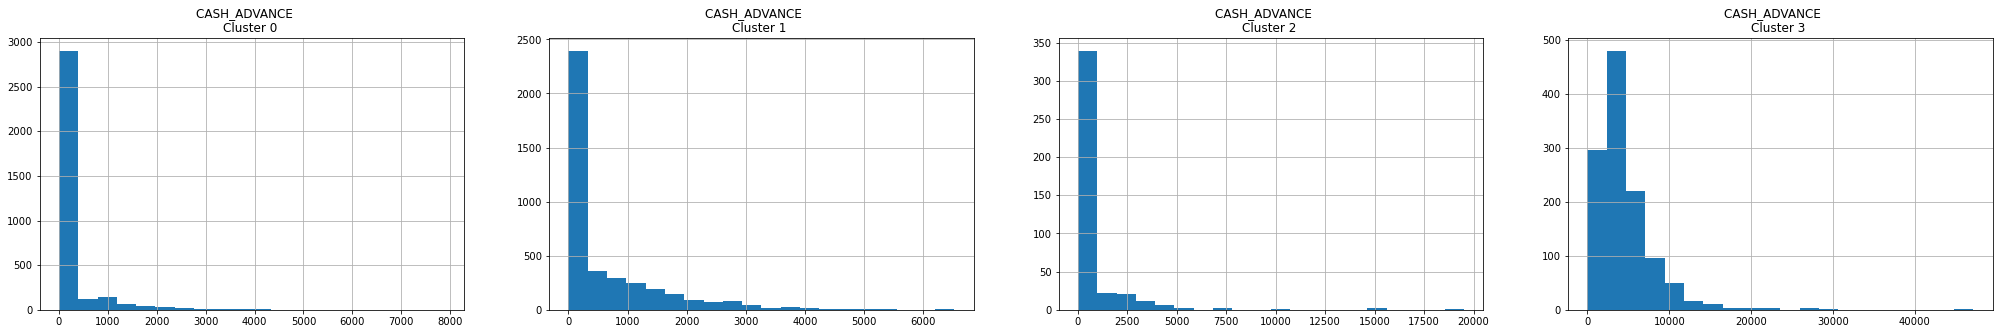

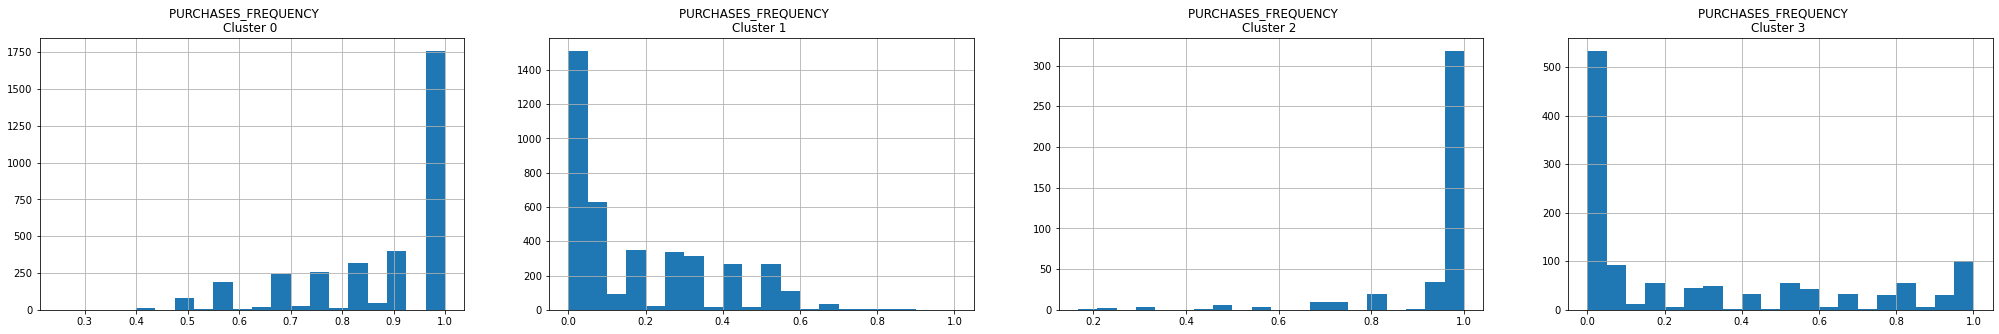

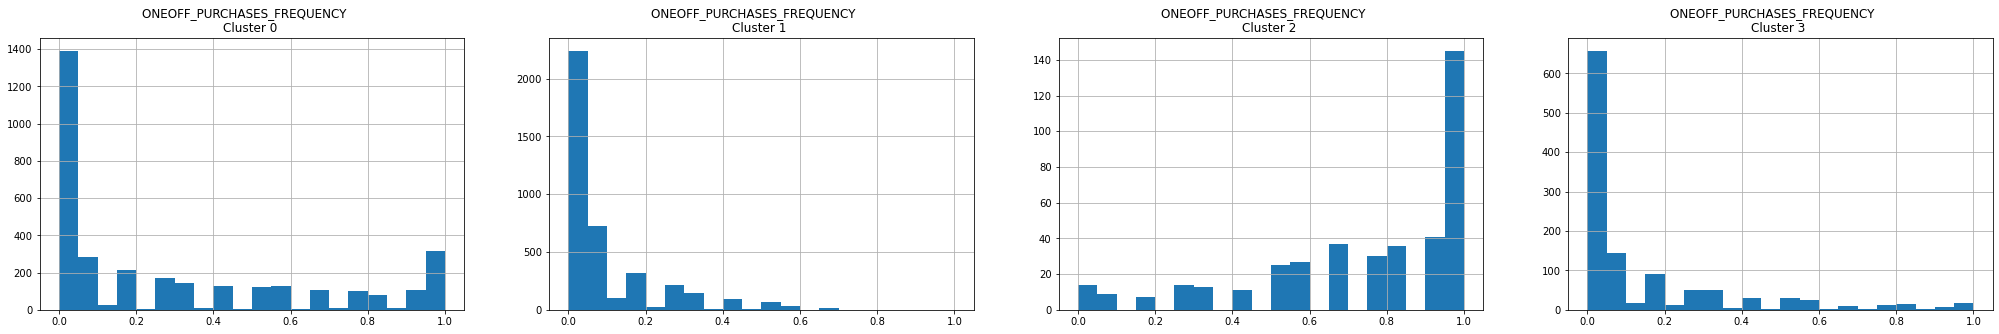

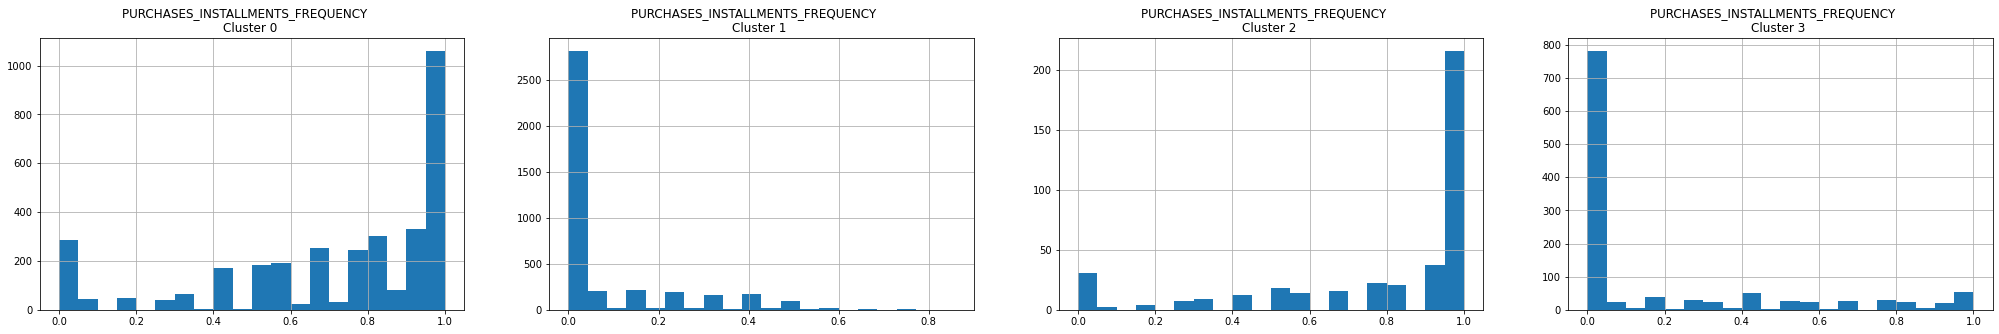

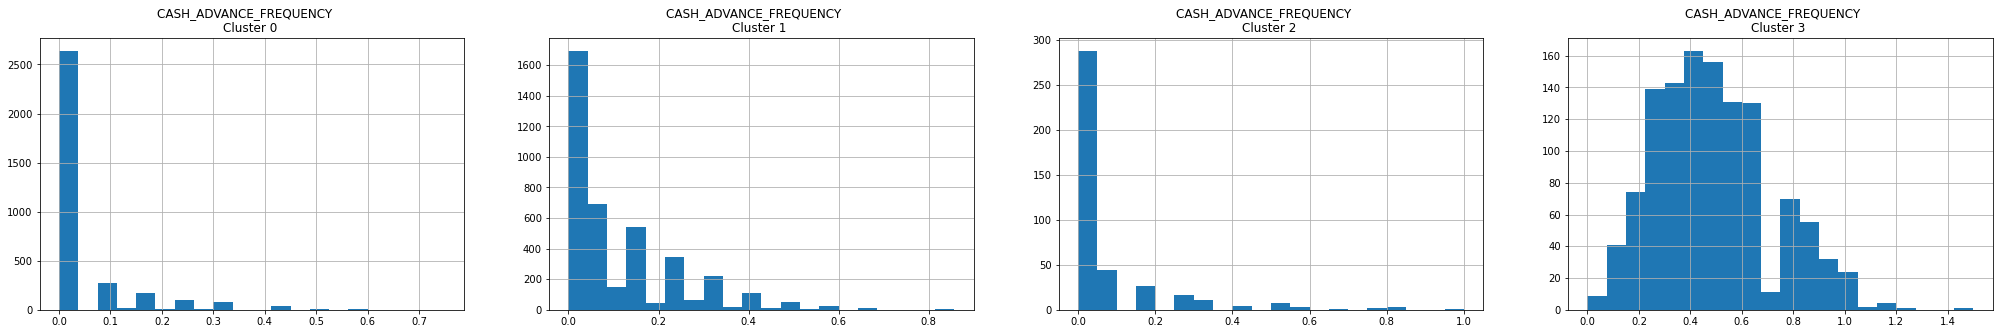

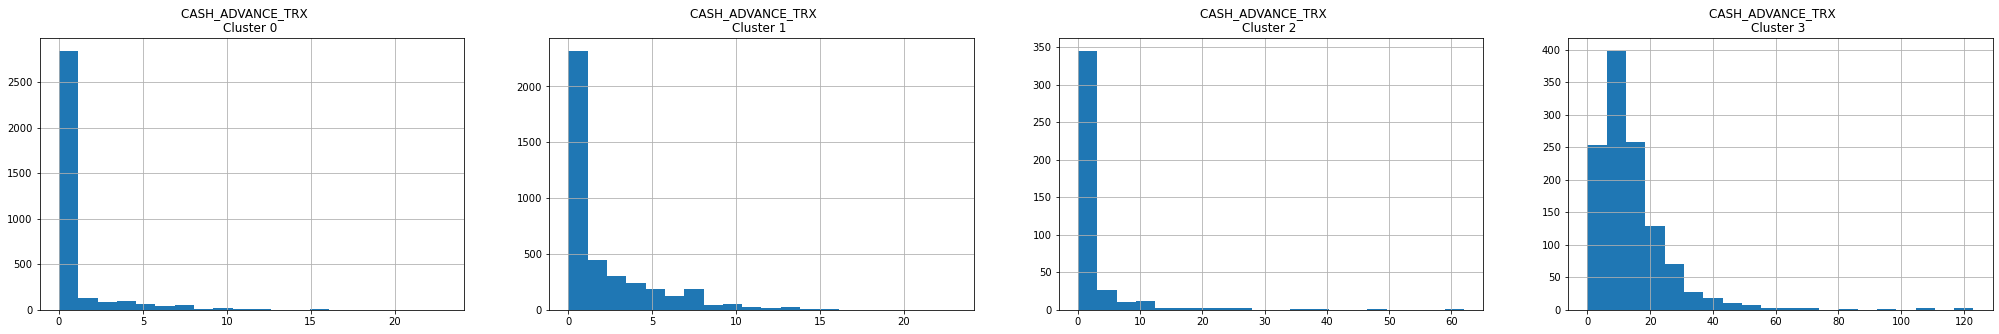

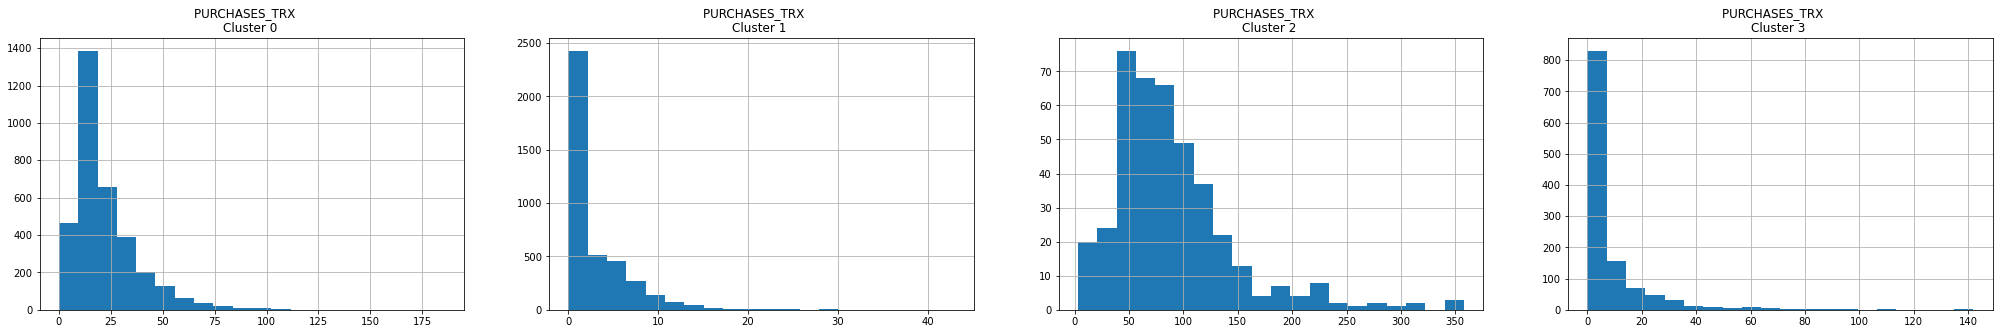

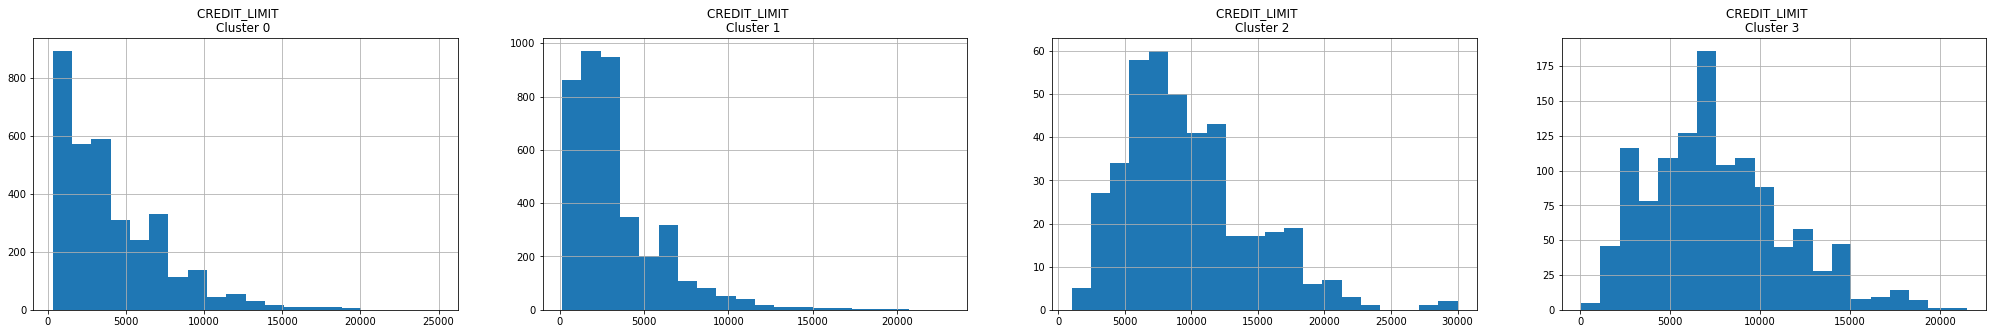

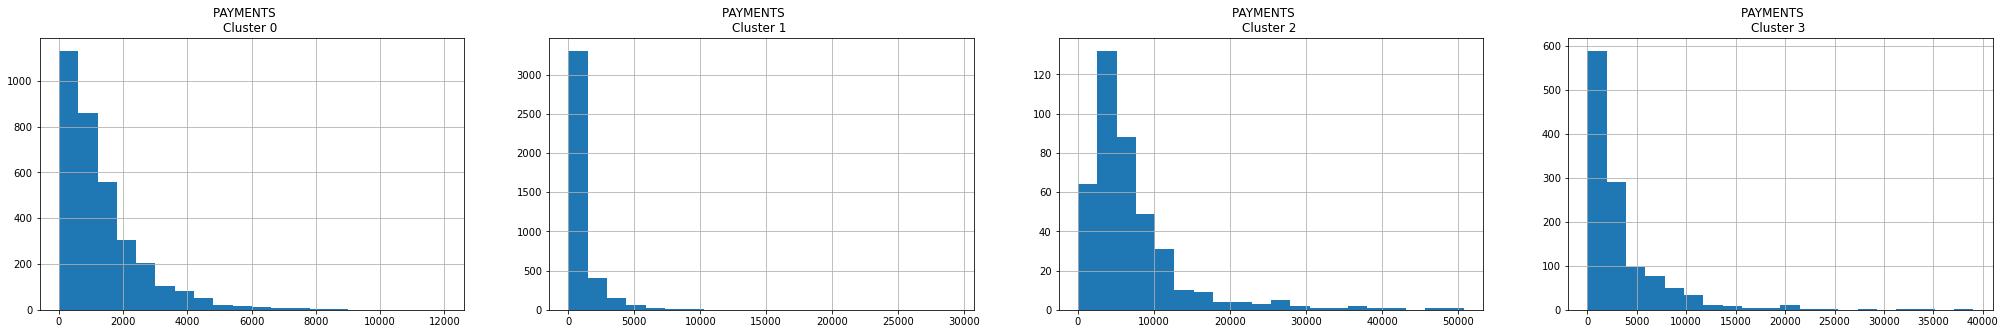

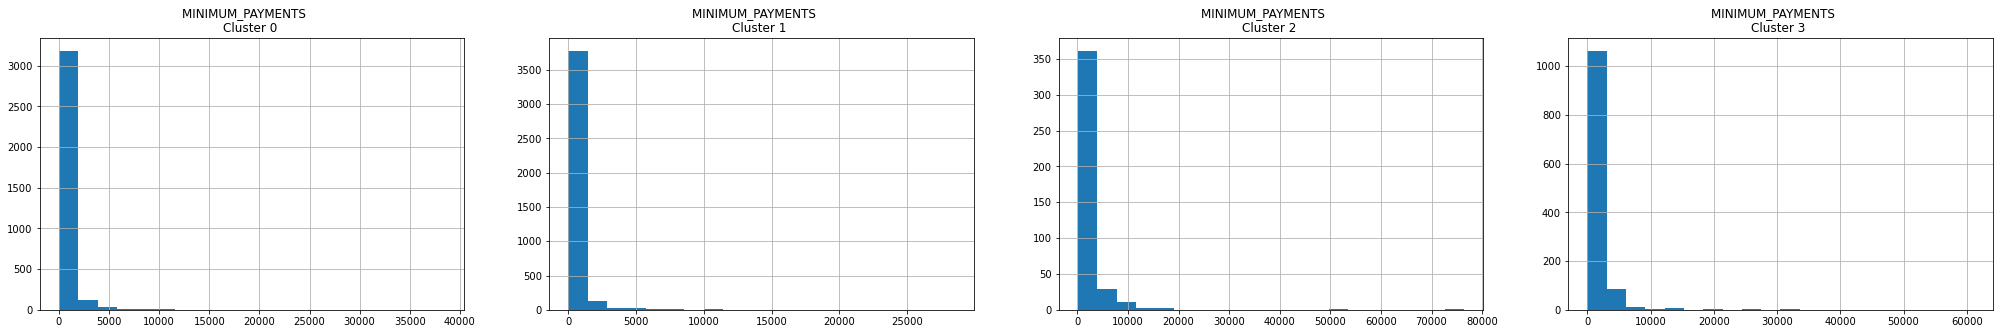

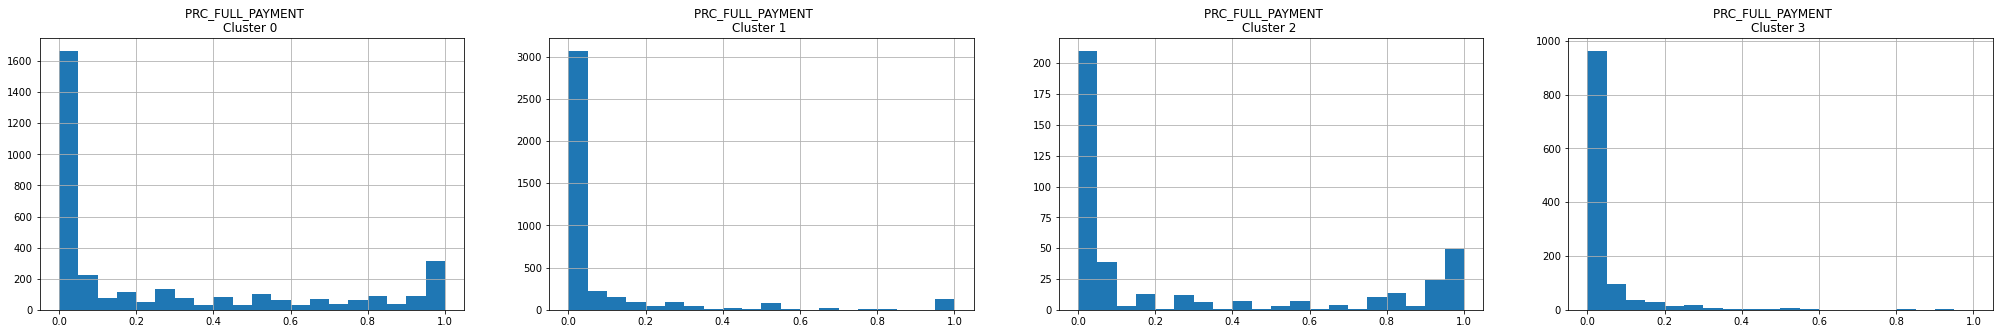

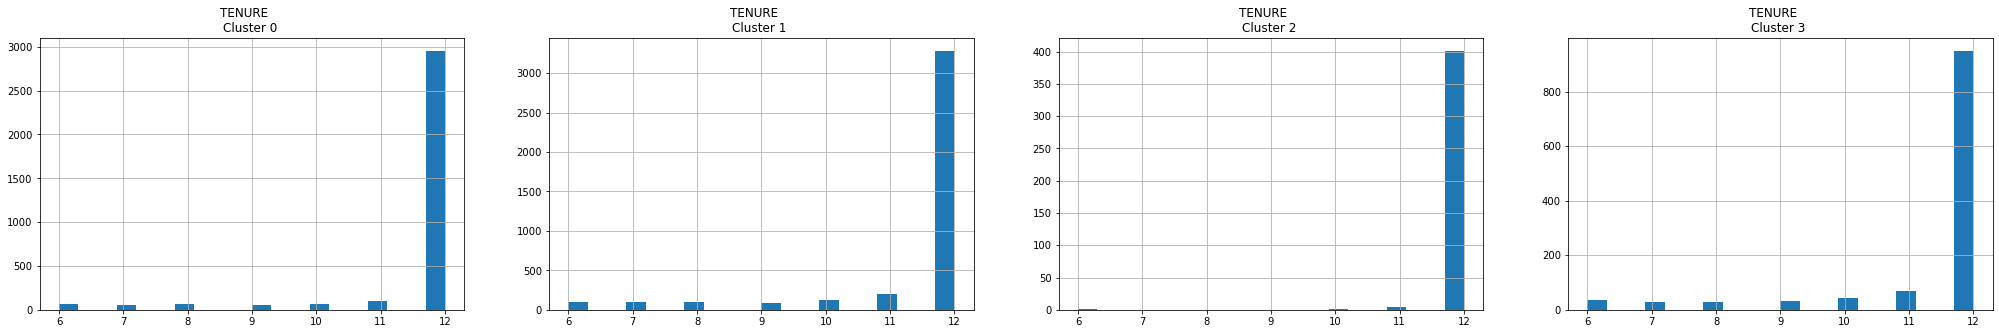

In [57]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(4):
    plt.subplot(1, 4, j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

# Pricipal Component Analysis

In [58]:
# Obtain the principal components 
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)

# Check data
principal_comp

array([[-1.68222141, -1.07645699],
       [-1.13829443,  2.50646771],
       [ 0.96968784, -0.38350137],
       ...,
       [-0.92620549, -1.81079012],
       [-2.33655437, -0.65797402],
       [-0.55641948, -0.40045244]])

In [59]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076457
1,-1.138294,2.506468
2,0.969688,-0.383501
3,-0.873629,0.043154
4,-1.599435,-0.688584


In [60]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076457,1
1,-1.138294,2.506468,3
2,0.969688,-0.383501,0
3,-0.873629,0.043154,1
4,-1.599435,-0.688584,1


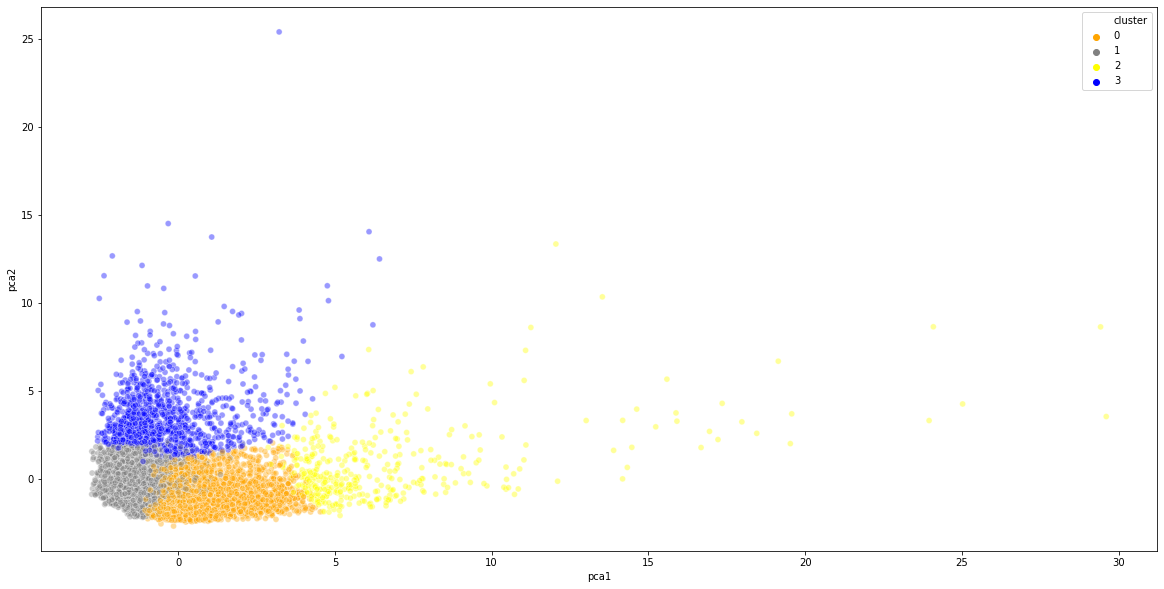

In [64]:
# Visualize the clusters
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="pca1", y="pca2", alpha = 0.4, hue = "cluster", data = pca_df, palette =['orange','gray','yellow','blue'])
plt.show()

# Conclusion

<img src="https://github.com/ijoseff/Bank-Customer-Market-Segmentation/blob/master/conclusion.png?raw=true" width = "800" height = "800" />

**First Customers cluster (Transactors):**
 - Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance (104 dollars) and cash advance (303 dollars), Percentage of full payment = 23%.


**Second customers cluster (revolvers):**
 - People who use credit card as a loan (most lucrative sector) with highest balance (5000 dollars) and cash advance (~5000 dollars), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%).

**Third customer cluster (VIP/Prime):**
 - People who have high credit limit 16,000 dollars and highest percentage of full payment, target for increase credit limit and increase spending habits.

**Fourth customer cluster (low tenure):**
 - These are customers with low tenure (7 years), low balance.